# <center> Module 4

Group: 12<br>
Darko Petrov<br>
Alexander Lendon

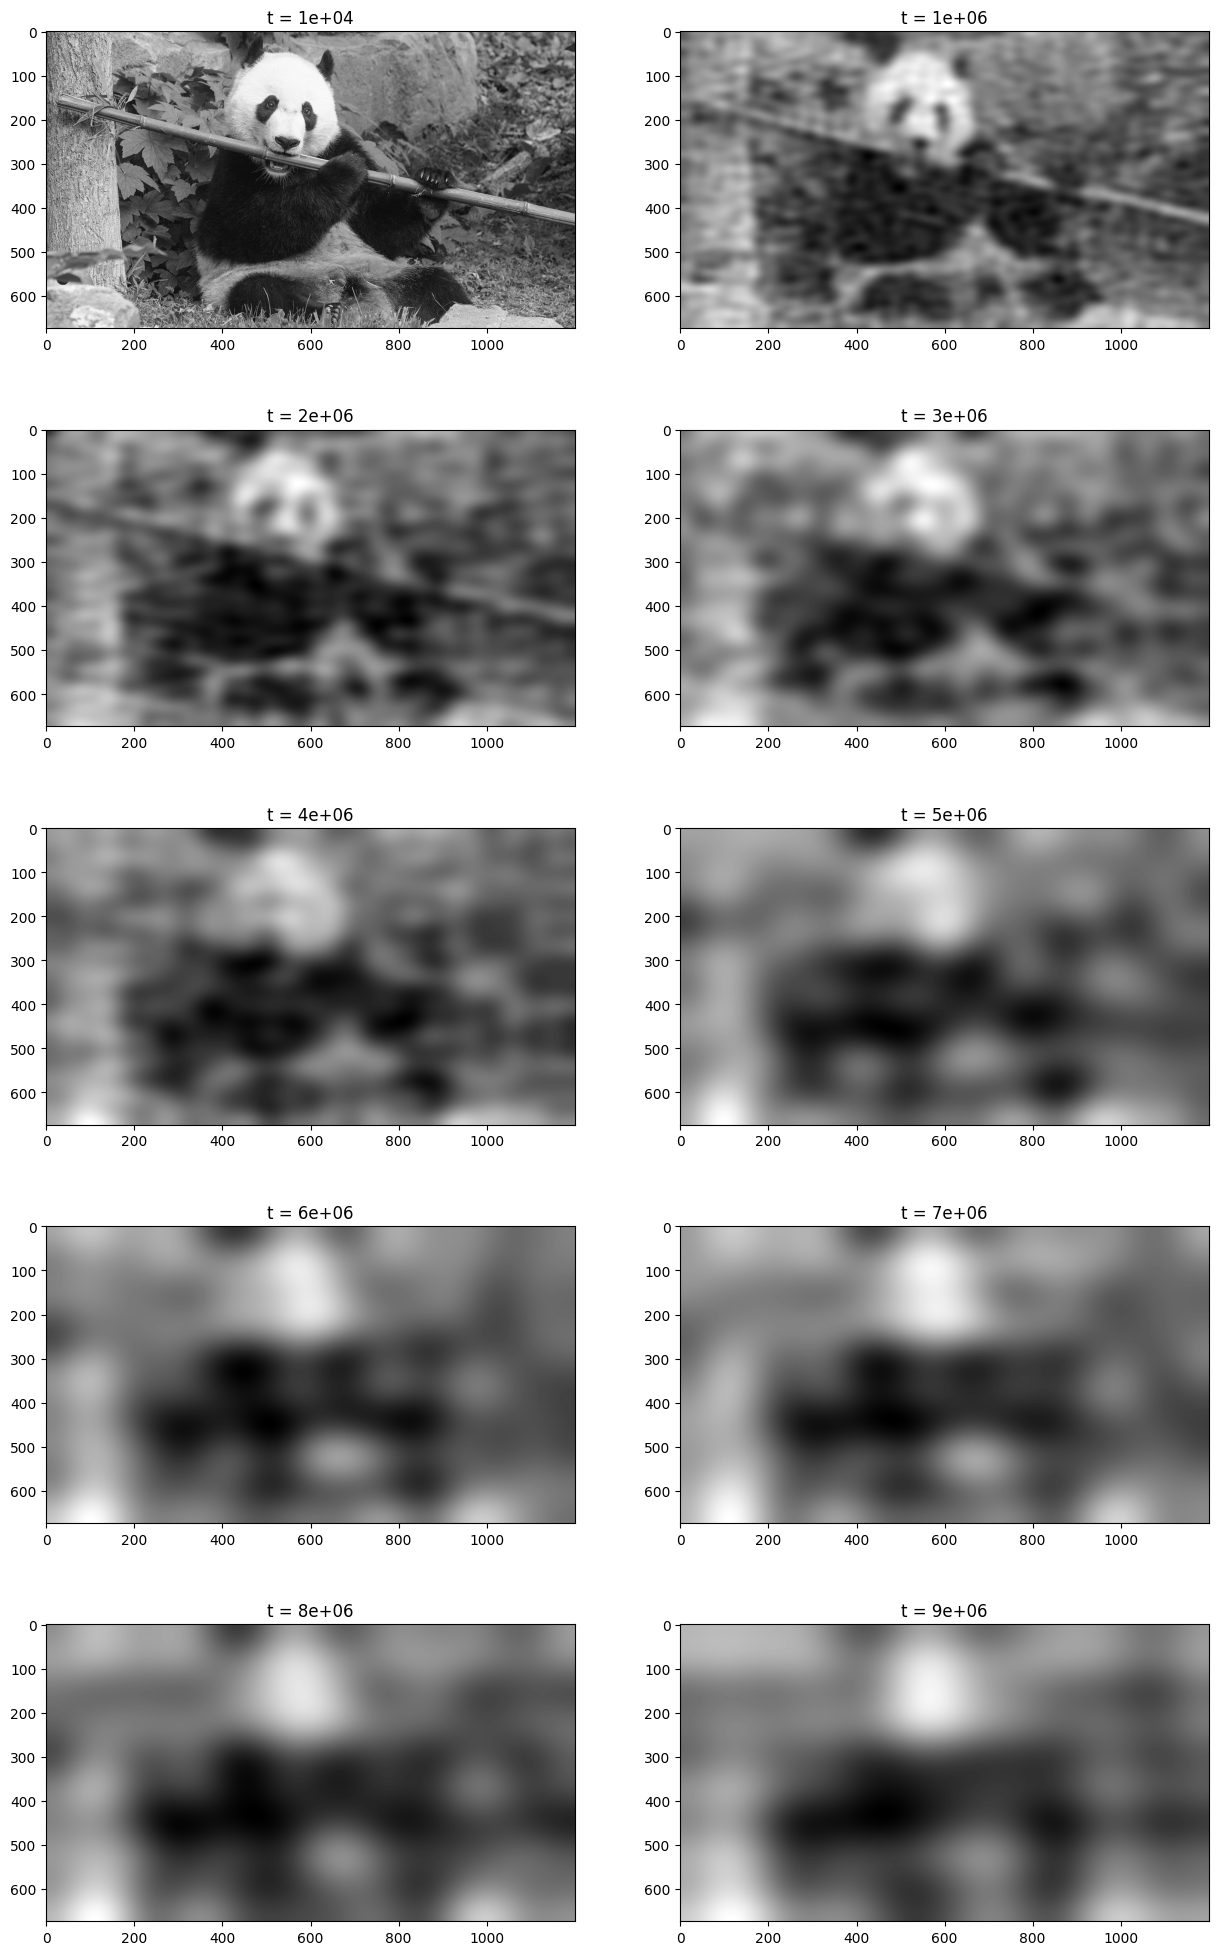

In [32]:
import imageio.v2 as iio
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as transform

img = iio.imread("panda.png")
# generating grayscale image:
bw_img=np.sum(img,2)/3

# 2D DCT transform 
coeffs= transform.dct(transform.dct(bw_img, axis=0),axis=1)
# Set a threshold t and threshold the coefficients in coeffs which will generate
# t = 0.01*np.max(np.abs(coeffs))
t = range(int(1e4), int(1e7), int(1e6))

fig, axs = plt.subplots(5, 2, figsize=(15, 25))
for i in range(5):
    for j in range(2):
        # Apply threshold
        approx_coeffs=coeffs*(abs(coeffs)>t[i*2+j])

        # Apply 2d idct
        approx_img=transform.idct(transform.idct(approx_coeffs, axis=1),axis=0)
        
        #
        axs[i, j].imshow(approx_img, cmap='gray')
        axs[i, j].set_title("t = {}".format(float(t[i*2+j])))
    
        
    # # approx_coeffs also calculate the fraction of nonzero coefficients
    # approx_coeffs=coeffs*(abs(coeffs)>i)

    # # Apply 2d idct
    # approx_img=transform.idct(transform.idct(approx_coeffs, axis=1),axis=0)
    
    # #
    # plt.imshow(approx_img, cmap='gray')
# plt.show()
